In [1]:
# https://blog.naver.com/ostin1038/222130267612

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
D = pd.read_csv("data/moef_index.csv",  sep="\t")
D.head()

,month,dallar_won,jpy_won,kospi,kosdaq,producers_price_index,composite_economic_indexes,current_account_balance,balance_of_trade,CSI
0,201701월,1162.1,1024.1,2067.6,616.1,3.9,100.5,3402.0,2612.0,93.3
1,201702월,1130.7,1005.8,2091.6,612.2,4.3,100.5,7439.0,6964.0,94.4
2,201703월,1118.4,1000.4,2160.2,619.3,4.3,100.7,5140.0,6059.0,96.7
3,201704월,1137.9,1023.2,2205.4,628.2,3.8,100.7,3184.0,12885.0,101.2
4,201705월,1119.5,1009.1,2347.4,652.0,3.4,100.7,4262.0,5639.0,108.0


In [4]:
# 따라 해 봄
# Q1
_ = """
Q1: 각 경제지표가 분기별 유의미하게 차이가 나는지 알아보고자 한다.
    분기를 집단으로 구분하여 각 집단간 지표별 차이가 있는지 확인해보려 한다.
    먼저 9개 경제지표 변수 모두 ANOVA 일원분산분산을 진행하여 분기별 차이가 있는 변수를 확인하고
    다음 사후 검정을 통해 해당 변수에 어떤 분기별 차이가 있었는지 확인하시오 
    (사후 검정시 Tukey's Range Test를 활용한다)
"""

In [5]:
def get_quarter(x):
    mon = str(x)[4:6]
    if mon=='01' or mon=='02' or mon=='03':
        return 'Q1'
    if mon=='04' or mon=='05' or mon=='06':
        return 'Q2'
    if mon=='07' or mon=='08' or mon=='09':
        return 'Q3'
    if mon=='10' or mon=='11' or mon=='12':
        return 'Q4'
    return 'N/A'
    
D['quarter'] = D['month'].apply(get_quarter)

In [8]:
D

,month,dallar_won,jpy_won,kospi,kosdaq,producers_price_index,composite_economic_indexes,current_account_balance,balance_of_trade,CSI,quarter
0,201701월,1162.1,1024.1,2067.6,616.1,3.9,100.5,3402.0,2612.0,93.3,Q1
1,201702월,1130.7,1005.8,2091.6,612.2,4.3,100.5,7439.0,6964.0,94.4,Q1
2,201703월,1118.4,1000.4,2160.2,619.3,4.3,100.7,5140.0,6059.0,96.7,Q1
3,201704월,1137.9,1023.2,2205.4,628.2,3.8,100.7,3184.0,12885.0,101.2,Q2
4,201705월,1119.5,1009.1,2347.4,652.0,3.4,100.7,4262.0,5639.0,108.0,Q2
5,201706월,1144.1,1021.4,2391.8,669.0,2.8,100.6,7009.0,10721.0,110.8,Q2
6,201707월,1119.0,1011.9,2402.7,650.5,3.0,100.5,7467.0,10223.0,110.9,Q3
7,201708월,1127.8,1020.2,2363.2,657.8,3.3,100.4,6139.0,6556.0,109.6,Q3
8,201709월,1145.4,1016.7,2394.5,652.8,3.8,100.4,12338.0,13419.0,107.4,Q3
9,201710월,1120.4,991.2,2523.4,694.2,3.6,100.2,6890.0,6934.0,108.9,Q4


In [11]:
D.head()

,month,dallar_won,jpy_won,kospi,kosdaq,producers_price_index,composite_economic_indexes,current_account_balance,balance_of_trade,CSI,quarter
0,201701월,1162.1,1024.1,2067.6,616.1,3.9,100.5,3402.0,2612.0,93.3,Q1
1,201702월,1130.7,1005.8,2091.6,612.2,4.3,100.5,7439.0,6964.0,94.4,Q1
2,201703월,1118.4,1000.4,2160.2,619.3,4.3,100.7,5140.0,6059.0,96.7,Q1
3,201704월,1137.9,1023.2,2205.4,628.2,3.8,100.7,3184.0,12885.0,101.2,Q2
4,201705월,1119.5,1009.1,2347.4,652.0,3.4,100.7,4262.0,5639.0,108.0,Q2


In [9]:
model = ols('dallar_won ~ C(quarter)', D).fit()
model2 = ols('jpy_won ~ C(quarter)', D).fit()
model3 = ols('kospi ~ C(quarter)', D).fit()
model4 = ols('kosdaq ~ C(quarter)', D).fit()
model5 = ols('producers_price_index ~ C(quarter)', D).fit()
model6 = ols('composite_economic_indexes ~ C(quarter)', D).fit()
model7 = ols('current_account_balance ~ C(quarter)', D).fit()
model8 = ols('balance_of_trade ~ C(quarter)',D).fit()
model9 = ols('CSI ~ C(quarter)', D).fit()


In [10]:
pd.concat([ anova_lm(model), 
            anova_lm(model2), 
            anova_lm(model3), 
            anova_lm(model4),
            anova_lm(model5), 
            anova_lm(model6), 
            anova_lm(model7), 
            anova_lm(model8), 
            anova_lm(model9)] )

,df,sum_sq,mean_sq,F,PR(>F)
C(quarter),3.0,4.538709e+03,1.512903e+03,0.685815,0.566134
Residual,39.0,8.603369e+04,2.205992e+03,NaN,NaN
C(quarter),3.0,1.049457e+04,3.498191e+03,1.177958,0.330564
Residual,39.0,1.158186e+05,2.969707e+03,NaN,NaN
C(quarter),3.0,2.350114e+04,7.833715e+03,0.210426,0.888571
Residual,39.0,1.451889e+06,3.722791e+04,NaN,NaN
C(quarter),3.0,7.720745e+03,2.573582e+03,0.305081,0.821536
Residual,39.0,3.289938e+05,8.435738e+03,NaN,NaN
C(quarter),3.0,1.977456e+00,6.591520e-01,0.207232,0.890777
Residual,39.0,1.240491e+02,3.180745e+00,NaN,NaN


In [12]:
# 다른 방법
stats.f_oneway(D[D.quarter=='Q1'].current_account_balance.values,
               D[D.quarter=='Q2'].current_account_balance.values,
               D[D.quarter=='Q3'].current_account_balance.values,
               D[D.quarter=='Q4'].current_account_balance.values,)

F_onewayResult(statistic=5.90969848933417, pvalue=0.0020015719028969275)

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [14]:
hsd = pairwise_tukeyhsd(D.current_account_balance, D.quarter, alpha=0.05)

In [16]:
hsd.groups

array(['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3', 'Q4', 'Q4',
       'Q4', 'Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3', 'Q4',
       'Q4', 'Q4', 'Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3',
       'Q4', 'Q4', 'Q4', 'Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3'],
      dtype=object)

In [17]:
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Q1,Q2,-291.3333,0.9,-3065.3882,2482.7216,False
Q1,Q3,3754.5333,0.0069,845.08,6663.9867,True
Q1,Q4,1903.4444,0.3352,-1092.8773,4899.7662,False
Q2,Q3,4045.8667,0.0033,1136.4133,6955.32,True
Q2,Q4,2194.7778,0.2185,-801.544,5191.0995,False
Q3,Q4,-1851.0889,0.3966,-4973.1847,1271.0069,False


In [ ]:
# Q1-Q3 , Q2-Q3 간 차이가 있다. (reject True)

In [18]:
# 따라 해 봄
# Q2
_= """
Q2: 환율 지표를 바탕으로 시계열 분석을 하고자 한다. 
    이때 요소분해법 가법 모델을 통해 추세(trend), 계절(seasonal), 오차(irregular) 시계열 요소로 분해한다. 
    기간은 2017년 1월부터 2019년 12월까지이며 12개월의 주기를 가진다. 
    이때 19년 6월 계절 요인 값을 소수 둘째자리까지 구하시오(셋째자리에서 버림)
"""

In [23]:
# statsmodels 버전에 따라 statsmodels.api.tsa.seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 

In [25]:
s = seasonal_decompose(D.dallar_won, model="additive", period=12)

In [26]:
pd.DataFrame({'observed': s.observed, 'trend':s.trend, 'seasonal': s.seasonal, 'resid':s.resid}).head()

,observed,trend,seasonal,resid
0,1162.1,NaN,-16.259433,NaN
1,1130.7,NaN,-12.285822,NaN
2,1118.4,NaN,-19.531655,NaN
3,1137.9,NaN,-2.685822,NaN
4,1119.5,NaN,10.680845,NaN


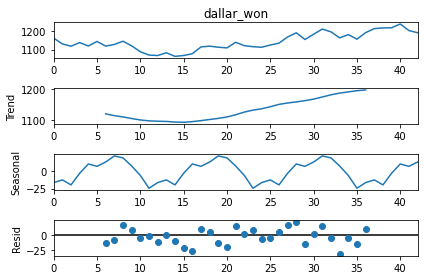

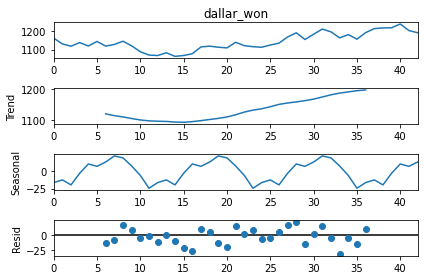

In [27]:
s.plot()

In [30]:
D.iloc[29]

month                         201906월
dallar_won                     1154.7
jpy_won                        1072.2
kospi                          2130.6
kosdaq                          690.5
producers_price_index             0.1
composite_economic_indexes      100.1
current_account_balance          5665
balance_of_trade                 3904
CSI                              97.5
quarter                            Q2
Name: 29, dtype: object

In [28]:
pd.DataFrame({'observed': s.observed, 'trend':s.trend, 'seasonal': s.seasonal, 'resid':s.resid}).iloc[29]

observed    1154.700000
trend       1163.120833
seasonal       7.253762
resid        -15.674595
Name: 29, dtype: float64

In [31]:
# Q3
_ = """
데이터 셋 지표를 바탕으로 다음달 유가증권 지표가 상승했는지를 예측하는 모델을 만들고자 한다.
독립변수는 코스닥지수를 제외한 8개 변수를 활용한다.
다음 익월 코스피 지수와 해당월 코스피 지수와의 차이를 따져보아 
양수면 '상승', 음수면 '하락' 으로 명목변수(변수명:check)를 만들어 종속변수로 활용한다.
트레인셋은 17년~19년 총 36행이며 테스트셋은 20년 1월부터 6월까지 6행이다.
랜덤포레스트 모델을 사용하며 테스트셋 6행 대비 예측값과 실제값이 같은 정답의 비중을 나타내시오.
(셋째짜리에서 버림, 둘째자리까지 나타냄)

랜덤포레스트 설정값: Number of Trees: 10, Criterion: Gini Impurity, Seed:13 외 디폴트
"""

In [32]:
D['change'] = np.sign(D.kospi.shift(periods=-1) - D.kospi)

In [33]:
D

,month,dallar_won,jpy_won,kospi,kosdaq,producers_price_index,composite_economic_indexes,current_account_balance,balance_of_trade,CSI,quarter,change
0,201701월,1162.1,1024.1,2067.6,616.1,3.9,100.5,3402.0,2612.0,93.3,Q1,1.0
1,201702월,1130.7,1005.8,2091.6,612.2,4.3,100.5,7439.0,6964.0,94.4,Q1,1.0
2,201703월,1118.4,1000.4,2160.2,619.3,4.3,100.7,5140.0,6059.0,96.7,Q1,1.0
3,201704월,1137.9,1023.2,2205.4,628.2,3.8,100.7,3184.0,12885.0,101.2,Q2,1.0
4,201705월,1119.5,1009.1,2347.4,652.0,3.4,100.7,4262.0,5639.0,108.0,Q2,1.0
5,201706월,1144.1,1021.4,2391.8,669.0,2.8,100.6,7009.0,10721.0,110.8,Q2,1.0
6,201707월,1119.0,1011.9,2402.7,650.5,3.0,100.5,7467.0,10223.0,110.9,Q3,-1.0
7,201708월,1127.8,1020.2,2363.2,657.8,3.3,100.4,6139.0,6556.0,109.6,Q3,1.0
8,201709월,1145.4,1016.7,2394.5,652.8,3.8,100.4,12338.0,13419.0,107.4,Q3,1.0
9,201710월,1120.4,991.2,2523.4,694.2,3.6,100.2,6890.0,6934.0,108.9,Q4,-1.0


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = RandomForestClassifier(n_estimators=10, criterion="gini", random_state=13)

In [36]:
ind_columns = ['dallar_won','jpy_won','kosdaq','producers_price_index',
               'composite_economic_indexes','current_account_balance','balance_of_trade','CSI']
train_X = D.iloc[0:36][ind_columns]
train_y = D.iloc[0:36].change.astype(int).values
test_X = D.iloc[36:42][ind_columns]
test_y = D.iloc[36:42].change.astype(int).values

In [41]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((36, 8), (36,), (6, 8), (6,))

In [42]:
clf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=13)

In [43]:
pred = clf.predict(test_X)

In [44]:
pd.DataFrame({'true':test_y, 'predict':pred})

,true,predict
0,-1,-1
1,-1,1
2,1,1
3,1,-1
4,1,-1
5,1,1


In [45]:
clf.feature_importances_

array([0.20714349, 0.13461433, 0.1495686 , 0.14019017, 0.07399967,
       0.10934218, 0.12303617, 0.06210538])